In [26]:
# scientific computing library
import numpy as np
# `.mat` to `Python`-compatible data converter
import scipy.io


# load `.mat` file
data = scipy.io.loadmat('data/%s.mat' % fname)

# Images
# N: number of images
# D: number of pixels
X = data['X']  # shape: [D x N]
y = data['l']  # shape: [1 x N]

assert(X.shape[1] == y.shape[1])
# Number of images
D, N = X.shape

# Fix the random seed
np.random.seed(13)

# Cardinality of labels
_card = len(set(y.ravel()))

# Step splitting of dataset
_step = int(N / _card)

# Shape boundaries
_bounds = np.arange(0, N, _step)

# Shapes
shapes = list(zip(_bounds[:-1], _bounds[1:]))

# Training Mask
_mask = []

for _shape in shapes:
    _idx = np.random.choice(
        np.arange(*_shape), int(0.8 * _step), replace=False)
    _mask.append(_idx)

mask_train = np.array(_mask).ravel()

mask_test = np.array(list(set(np.arange(0, N)) - set(mask_train)))

# Partition dataset to train and test sets
X_train, X_test = X[:, mask_train], X[:, mask_test]
y_train, y_test = y[:, mask_train], y[:, mask_test]

NameError: name 'fname' is not defined

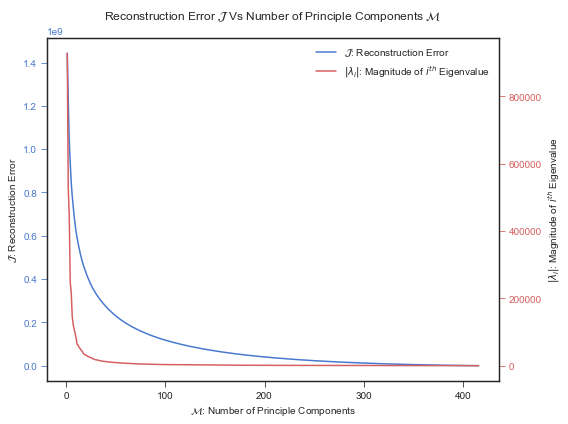

In [33]:
import matplotlib

# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# prettify plots
plt.rcParams['figure.figsize'] = [8.0, 6.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")
sns_b, sns_g, sns_r, sns_v, sns_y, sns_l = sns.color_palette("muted")



SHAPE = (46, 56)



D, N = X_train.shape


# mean face
mean_face = X_train.mean(axis=1).reshape(-1, 1)

A = X_train - mean_face

S = (1 / N) * np.dot(A.T, A)


# Calculate eigenvalues `w` and eigenvectors `v`

_l, _v = np.linalg.eig(S)

# Indexes of eigenvalues, sorted by value

_indexes = np.argsort(_l)[::-1]

# TODO
# threshold w's


# Sorted eigenvalues and eigenvectors
l = _l[_indexes]

v = _v[:, _indexes]


M = np.arange(1, N + 1)

error = []


for j, m in enumerate(M):


    V = v[:, :m]

    _U = np.dot(A, V)

    U = _U / np.apply_along_axis(np.linalg.norm, 0, _U)

    W = np.dot(U.T, A)

    A_hat = np.dot(U, W)

    error.append(np.mean(np.sum((A - A_hat)**2)))
# fix bug of progress bar after '\r'
print('')

fig, ax1 = plt.subplots()

lns1 = ax1.plot(M, error, color=sns_b, label='$\mathcal{J}$: Reconstruction Error')
ax1.tick_params('y', colors=sns_b)

ax2 = ax1.twinx()
lns2 = ax2.plot(M, l, color=sns_r, label='$|\lambda_i|$: Magnitude of $i^{th}$ Eigenvalue')
ax2.tick_params('y', colors=sns_r)

ax1.set_title(
    'Reconstruction Error $\mathcal{J}$ Vs Number of Principle Components $\mathcal{M}$\n')
ax1.set_xlabel('$\mathcal{M}$: Number of Principle Components')
ax1.set_ylabel('$\mathcal{J}$: Reconstruction Error')
ax2.set_ylabel('$|\lambda_i|$: Magnitude of $i^{th}$ Eigenvalue')
# fix legend hack
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
# ax1.grid()
fig.tight_layout()